<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [182]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-3-r5.csv?token=AKVFSOFRBGP2XHRCES2FX4C6ZLN4I')
print(df.shape)
df

(34529, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,80,4,2,4,1,1,5,17,23,7,0,0,1,4,2,0.50,12,5,1,5,5,25,8,4,4,4,20,85,100,1
1,81,4,2,4,2,2,5,17,23,7,0,0,1,4,2,0.50,13,4,2,5,8,40,8,8,16,16,20,85,100,1
2,82,4,2,4,3,2,5,17,23,7,0,0,1,4,2,0.50,14,3,3,5,9,45,8,12,24,24,20,85,100,1
3,83,4,2,4,4,2,5,17,23,7,0,0,1,4,2,0.50,15,2,4,5,8,40,8,16,32,32,20,85,100,1
4,87,4,2,4,5,3,5,17,23,7,0,0,1,4,2,0.50,19,1,5,5,5,25,8,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34524,3268887,2,4,4,1,1,5,17,20,4,3,3,20043,4,1,0.25,9,1,1,1,1,1,8,4,4,80172,20,85,100,1
34525,3268888,2,4,4,2,2,5,17,20,4,3,3,20043,4,1,0.25,10,1,1,1,1,1,8,8,16,320688,20,85,100,1
34526,3268889,2,4,4,3,2,5,17,20,4,3,3,20043,4,1,0.25,11,1,1,1,1,1,8,12,24,481032,20,85,100,1
34527,3268890,2,4,4,4,2,5,17,20,4,3,3,20043,4,1,0.25,12,1,1,1,1,1,8,16,32,641376,20,85,100,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-1-r5.csv?token=AKVFSOCVIL6VXZIHO2B2TUS6ZLOBC')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-6-r5.csv?token=AKVFSOCRIMKNOAE7V5IEBH26ZLOBG')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-9-r5.csv?token=AKVFSOG6GR4MRQXC7TE7EJC6ZLOBI')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-14-r5.csv?token=AKVFSOAYTAYPV4TI752235K6ZLOBM')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-5-r5.csv?token=AKVFSOGVV3XOAPLROLASAL26ZLOGC')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-12-r5.csv?token=AKVFSOGW4LL27XGYMBK4LUC6ZLOGG')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOBNX22TYJ6LO3JBEAS6ZLOGM')

In [184]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(73974, 30)
(62721, 30)
(60770, 30)
(52873, 30)
(83193, 30)
(31862, 30)
(34357, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [186]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,5,5,23,7,2,2,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9,1
1,62,0,2,4,1,1,5,17,23,7,5,5,2,2,2,1.0,12,11,2,12,22,264,0,4,4,8,20,85,100,1
2,63,0,2,4,2,2,5,17,23,7,5,5,2,2,2,1.0,13,10,3,12,30,360,0,8,16,32,20,85,100,1
3,64,0,2,4,3,2,5,17,23,7,5,5,2,2,2,1.0,14,9,4,12,36,432,0,12,24,48,20,85,100,1
4,65,0,2,4,4,2,5,17,23,7,5,5,2,2,2,1.0,15,8,5,12,40,480,0,16,32,64,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434274,3275371,2,4,4,1,1,5,17,20,4,15,15,20058,5,1,0.2,9,1,1,1,1,1,8,4,4,80232,20,85,100,1
434275,3275372,2,4,4,2,2,5,17,20,4,15,15,20058,5,1,0.2,10,1,1,1,1,1,8,8,16,320928,20,85,100,1
434276,3275373,2,4,4,3,2,5,17,20,4,15,15,20058,5,1,0.2,11,1,1,1,1,1,8,12,24,481392,20,85,100,1
434277,3275374,2,4,4,4,2,5,17,20,4,15,15,20058,5,1,0.2,12,1,1,1,1,1,8,16,32,641856,20,85,100,1


In [187]:
df.shape

(434279, 30)

Test Data

In [188]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-2-r5.csv?token=AKVFSOCJHCPVN6XMKX2G5NK6ZLOM2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-5-r5.csv?token=AKVFSODMTHIXHEMEUCX4JA26ZLOM6')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-10-r5.csv?token=AKVFSOHGBJKDQINBIX6LU626ZLONA')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-12-r5.csv?token=AKVFSOH2F5JWVRW3AYVTT6C6ZLONE')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-13-r5.csv?token=AKVFSOBRFOJ62DKPXZLK6AK6ZLONG')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-15-r5.csv?token=AKVFSOCFFDOFSGTMBD2WFB26ZLONK')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-10-r5.csv?token=AKVFSOCH47THGP4WDRKZ7IK6ZLORK')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(53031, 30)
(101630, 30)
(52873, 30)
(50262, 30)
(60769, 30)
(52755, 30)
(34647, 30)


In [189]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,102,4,2,4,1,1,5,17,23,7,0,0,1,4,2,0.50,12,5,1,5,5,25,8,4,4,4,20,85,100,0
1,103,4,2,4,2,2,5,17,23,7,0,0,1,4,2,0.50,13,4,2,5,8,40,8,8,16,16,20,85,100,0
2,104,4,2,4,3,2,5,17,23,7,0,0,1,4,2,0.50,14,3,3,5,9,45,8,12,24,24,20,85,100,0
3,105,4,2,4,4,2,5,17,23,7,0,0,1,4,2,0.50,15,2,4,5,8,40,8,16,32,32,20,85,100,0
4,109,4,2,4,5,3,5,17,23,7,0,0,1,4,2,0.50,19,1,5,5,5,25,8,20,60,60,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53026,3270403,2,4,4,1,1,5,17,20,4,3,3,30066,4,1,0.25,9,1,1,1,1,1,8,4,4,120264,20,85,100,0
53027,3270404,2,4,4,2,2,5,17,20,4,3,3,30066,4,1,0.25,10,1,1,1,1,1,8,8,16,481056,20,85,100,0
53028,3270405,2,4,4,3,2,5,17,20,4,3,3,30066,4,1,0.25,11,1,1,1,1,1,8,12,24,721584,20,85,100,0
53029,3270406,2,4,4,4,2,5,17,20,4,3,3,30066,4,1,0.25,12,2,1,2,2,4,8,16,32,962112,20,85,100,0


In [190]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [192]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.160517,-0.028536,-0.004933,0.007427,0.199213,0.208640,0.003820,0.342452,-0.114012,-0.430783,-0.206034,-0.090942,-0.002181,-0.059247,-0.041594,-0.032711,0.575323,-0.036885,-0.022567,-0.014871,0.138256,0.203735,0.191540,-0.070813
inport,-0.160517,1.000000,-0.160914,-0.010690,0.016095,0.236162,0.164342,0.019985,0.253549,0.094942,0.158832,-0.163753,-0.062155,-0.133760,-0.124646,-0.100859,-0.082988,0.648500,-0.075889,-0.062460,-0.029757,0.062382,0.207995,0.179251,-0.235615
cache_coherence_type,-0.028536,-0.160914,1.000000,0.212167,-0.319446,-0.225815,-0.237272,0.045925,-0.087183,-0.109693,-0.116203,-0.147163,0.070918,-0.011149,0.038027,0.040575,0.040379,-0.163243,0.451472,0.378281,0.288210,0.616250,-0.231250,0.146944,0.012133
flit_id,-0.004933,-0.010690,0.212167,1.000000,-0.033076,0.249667,0.239431,0.009941,0.059986,0.030040,0.000374,0.382297,-0.055019,0.109574,0.034709,0.034910,0.021533,-0.024476,0.947432,0.899235,0.634203,0.371320,0.246420,0.333329,-0.005633
flit_type,0.007427,0.016095,-0.319446,-0.033076,1.000000,-0.375908,-0.360495,-0.014967,-0.090317,-0.045229,-0.000563,0.310080,-0.098298,0.077018,-0.013539,-0.029156,-0.016952,0.036852,-0.085138,0.190087,0.131566,-0.559072,-0.371019,-0.501872,0.008482
vnet,0.199213,0.236162,-0.225815,0.249667,-0.375908,1.000000,0.985191,-0.031632,0.274995,0.151438,0.128127,-0.404336,-0.035946,-0.000852,-0.023412,-0.026504,-0.040686,0.349323,0.050237,-0.010780,-0.032127,0.628050,0.997578,0.930413,-0.065287
vc,0.208640,0.164342,-0.237272,0.239431,-0.360495,0.985191,1.000000,-0.035783,0.237114,0.080557,0.057740,-0.390932,-0.031979,0.025511,-0.004115,-0.008628,-0.024790,0.298678,0.042396,-0.016423,-0.039471,0.606926,0.994719,0.911066,-0.047265
traversal_id,0.003820,0.019985,0.045925,0.009941,-0.014967,-0.031632,-0.035783,1.000000,0.018753,0.037106,0.013661,0.052782,0.054080,0.054130,0.068846,0.054271,0.044740,0.015315,0.024861,0.019397,0.562501,0.011112,-0.033414,-0.014840,-0.299437
hop_count,0.342452,0.253549,-0.087183,0.059986,-0.090317,0.274995,0.237114,0.018753,1.000000,0.465385,-0.075589,0.026946,-0.145721,-0.117806,-0.167662,-0.127128,-0.099380,0.446810,-0.007443,-0.017325,-0.003330,0.152673,0.260649,0.246421,-0.050336
current_hop,-0.114012,0.094942,-0.109693,0.030040,-0.045229,0.151438,0.080557,0.037106,0.465385,1.000000,0.778445,0.272352,-0.013634,-0.085420,-0.063021,-0.059394,-0.050113,-0.012092,-0.038999,-0.036333,-0.007261,0.034804,0.123323,0.112496,-0.034567


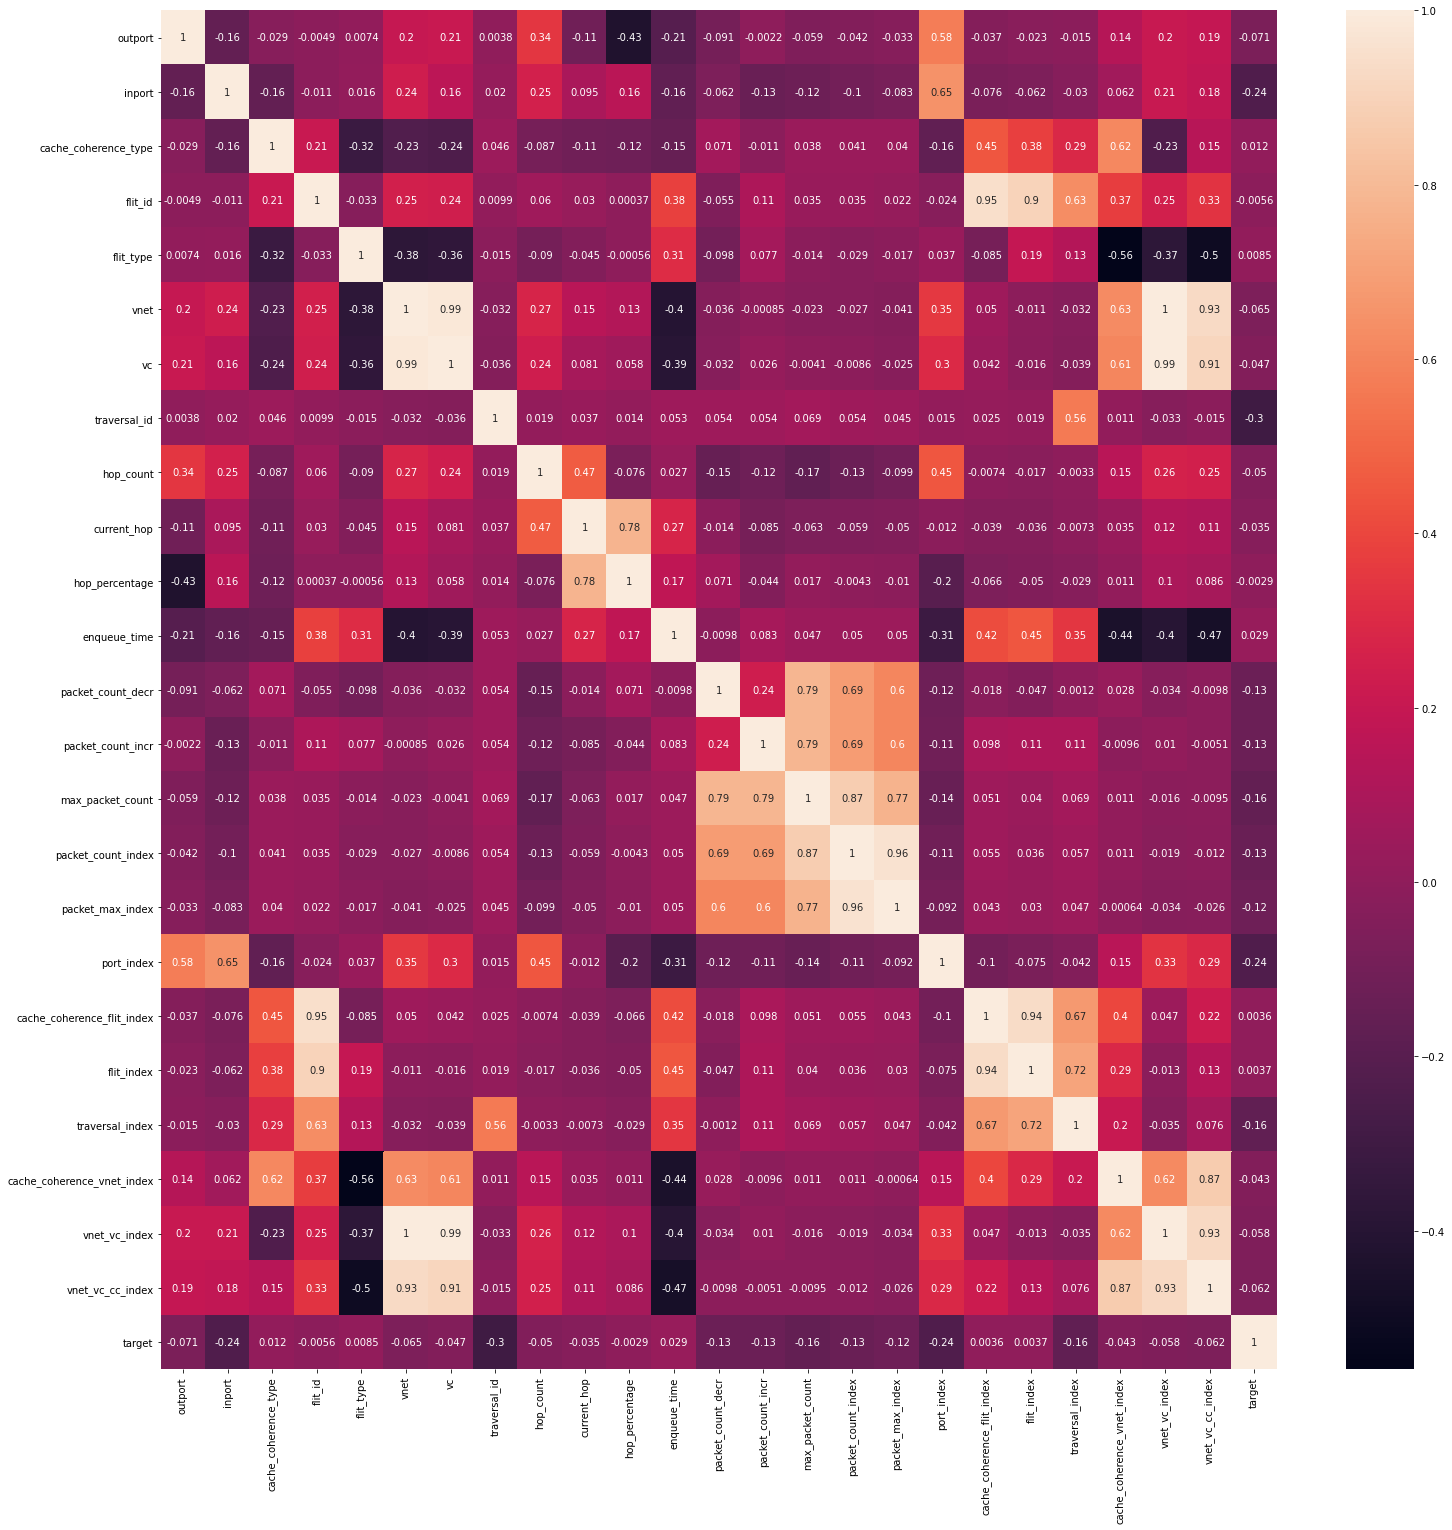

In [193]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [194]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,2,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9
1,0,2,4,1,1,5,17,2,2,2,1.0,12,11,2,12,22,264,0,4,4,8,20,85,100
2,0,2,4,2,2,5,17,2,2,2,1.0,13,10,3,12,30,360,0,8,16,32,20,85,100
3,0,2,4,3,2,5,17,2,2,2,1.0,14,9,4,12,36,432,0,12,24,48,20,85,100
4,0,2,4,4,2,5,17,2,2,2,1.0,15,8,5,12,40,480,0,16,32,64,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434274,2,4,4,1,1,5,17,20058,5,1,0.2,9,1,1,1,1,1,8,4,4,80232,20,85,100
434275,2,4,4,2,2,5,17,20058,5,1,0.2,10,1,1,1,1,1,8,8,16,320928,20,85,100
434276,2,4,4,3,2,5,17,20058,5,1,0.2,11,1,1,1,1,1,8,12,24,481392,20,85,100
434277,2,4,4,4,2,5,17,20058,5,1,0.2,12,1,1,1,1,1,8,16,32,641856,20,85,100


In [195]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.00,0.0,0.000000,0.323529,0.000000,0.323529,0.034056,0.012611,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
1,0.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.000033,0.4,0.50,1.0,0.133333,0.294118,0.029412,0.323529,0.065015,0.023194,0.000000,0.103448,0.000000,0.000001,0.944444,0.920635,1.0
2,0.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.000033,0.4,0.50,1.0,0.150000,0.264706,0.058824,0.323529,0.089783,0.031661,0.000000,0.241379,0.139535,0.000010,0.944444,0.920635,1.0
3,0.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.000033,0.4,0.50,1.0,0.166667,0.235294,0.088235,0.323529,0.108359,0.038010,0.000000,0.379310,0.232558,0.000016,0.944444,0.920635,1.0
4,0.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.000033,0.4,0.50,1.0,0.183333,0.205882,0.117647,0.323529,0.120743,0.042244,0.000000,0.517241,0.325581,0.000022,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434274,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,0.666611,1.0,0.25,0.2,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.029665,0.944444,0.920635,1.0
434275,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,0.666611,1.0,0.25,0.2,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.118663,0.944444,0.920635,1.0
434276,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,0.666611,1.0,0.25,0.2,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.177995,0.944444,0.920635,1.0
434277,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.666611,1.0,0.25,0.2,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.237328,0.944444,0.920635,1.0


In [196]:
train_X[train_X.duplicated()].shape

(9951, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [198]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.133333,0.153846,0.000000,0.153846,0.020513,0.004536,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.150000,0.115385,0.038462,0.153846,0.035897,0.007371,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.0
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.166667,0.076923,0.076923,0.153846,0.041026,0.008316,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.0
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.183333,0.038462,0.115385,0.153846,0.035897,0.007371,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.0
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.250000,0.000000,0.153846,0.153846,0.020513,0.004536,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53026,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044501,0.944444,0.920635,1.0
53027,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178007,0.944444,0.920635,1.0
53028,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267012,0.944444,0.920635,1.0
53029,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.133333,0.038462,0.000000,0.038462,0.005128,0.000567,0.666667,0.517241,0.325581,0.356016,0.944444,0.920635,1.0


In [199]:
test_X[test_X.duplicated()].shape

(14, 24)

In [200]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(30, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.4,0.00,0.000000,0.000000,0.166667,0.000000,0.166667,0.019608,0.004411,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000067,0.4,0.50,1.000000,0.131148,0.133333,0.033333,0.166667,0.035294,0.007435,0.000000,0.103448,0.000000,0.000003,0.944444,0.920635,1.000000
2,0.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000067,0.4,0.50,1.000000,0.147541,0.100000,0.066667,0.166667,0.043137,0.008948,0.000000,0.241379,0.139535,0.000016,0.944444,0.920635,1.000000
3,0.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000067,0.4,0.50,1.000000,0.163934,0.066667,0.100000,0.166667,0.043137,0.008948,0.000000,0.379310,0.232558,0.000025,0.944444,0.920635,1.000000
4,0.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000067,0.4,0.50,1.000000,0.180328,0.033333,0.133333,0.166667,0.035294,0.007435,0.000000,0.517241,0.325581,0.000034,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101625,0.5,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.6,0.25,0.333333,0.081967,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133532,0.333333,0.000000,0.197802
101626,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.250000,0.098361,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178043,0.944444,0.920635,1.000000
101627,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.250000,0.114754,0.066667,0.000000,0.066667,0.007843,0.001008,0.666667,0.379310,0.232558,0.267065,0.944444,0.920635,1.000000
101628,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.250000,0.131148,0.033333,0.033333,0.066667,0.011765,0.001386,0.666667,0.517241,0.325581,0.356088,0.944444,0.920635,1.000000


In [201]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(14, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.148148,0.137931,0.000000,0.137931,0.016736,0.003334,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.166667,0.103448,0.034483,0.137931,0.029289,0.005417,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.0
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.185185,0.068966,0.068966,0.137931,0.033473,0.006112,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.0
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.203704,0.034483,0.103448,0.137931,0.029289,0.005417,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.0
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.0,0.666667,0.666667,0.50,0.277778,0.000000,0.137931,0.137931,0.016736,0.003334,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52868,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.092593,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044501,0.944444,0.920635,1.0
52869,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178007,0.944444,0.920635,1.0
52870,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.129630,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267012,0.944444,0.920635,1.0
52871,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,1.0,0.666667,0.333333,0.25,0.148148,0.034483,0.000000,0.034483,0.004184,0.000417,0.666667,0.517241,0.325581,0.356016,0.944444,0.920635,1.0


In [202]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.666667,0.500000,0.135593,0.129032,0.000000,0.129032,0.01476,0.002758,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.00,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.500000,0.152542,0.096774,0.032258,0.129032,0.02583,0.004481,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.000000
2,1.00,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.500000,0.169492,0.064516,0.064516,0.129032,0.02952,0.005056,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.000000
3,1.00,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.500000,0.186441,0.032258,0.096774,0.129032,0.02583,0.004481,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.000000
4,1.00,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.666667,0.500000,0.254237,0.000000,0.129032,0.129032,0.01476,0.002758,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50257,0.75,0.25,0.000000,0.00,1.000000,0.0,0.111111,0.999867,1.000000,1.000000,0.600000,0.677966,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000,0.000000,0.044517,0.000000,0.047619,0.000000
50258,0.75,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999867,0.000000,0.333333,0.500000,0.067797,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.068966,0.093023,0.133554,0.333333,0.000000,0.197802
50259,0.50,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999933,0.333333,0.333333,0.333333,0.067797,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.068966,0.093023,0.133563,0.333333,0.000000,0.197802
50260,1.00,0.50,1.000000,0.00,1.000000,0.0,0.000000,0.999967,0.666667,0.333333,0.250000,0.084746,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.206897,0.279070,0.311660,1.000000,0.000000,0.593407


In [203]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(26, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.5,0.00,0.000000,1.0,0.888889,0.000067,0.666667,0.666667,0.5,0.135593,0.12500,0.00000,0.12500,0.013889,0.002517,0.166667,0.103448,0.000000,0.000003,0.944444,0.920635,1.0
1,0.25,0.5,0.5,0.25,0.333333,1.0,0.888889,0.000067,0.666667,0.666667,0.5,0.152542,0.09375,0.03125,0.12500,0.024306,0.004090,0.166667,0.241379,0.139535,0.000016,0.944444,0.920635,1.0
2,0.25,0.5,0.5,0.50,0.333333,1.0,0.888889,0.000067,0.666667,0.666667,0.5,0.169492,0.06250,0.06250,0.12500,0.027778,0.004614,0.166667,0.379310,0.232558,0.000025,0.944444,0.920635,1.0
3,0.25,0.5,0.5,0.75,0.333333,1.0,0.888889,0.000067,0.666667,0.666667,0.5,0.186441,0.03125,0.09375,0.12500,0.024306,0.004090,0.166667,0.517241,0.325581,0.000034,0.944444,0.920635,1.0
4,0.25,0.5,0.5,1.00,0.666667,1.0,0.888889,0.000067,0.666667,0.666667,0.5,0.254237,0.00000,0.12500,0.12500,0.013889,0.002517,0.166667,0.655172,0.651163,0.000065,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60764,1.00,0.5,0.5,0.00,0.000000,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.135593,0.00000,0.00000,0.00000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044562,0.944444,0.920635,1.0
60765,1.00,0.5,0.5,0.25,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.152542,0.09375,0.00000,0.09375,0.010417,0.001573,0.666667,0.241379,0.139535,0.178251,0.944444,0.920635,1.0
60766,1.00,0.5,0.5,0.50,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.169492,0.06250,0.03125,0.09375,0.017361,0.002412,0.666667,0.379310,0.232558,0.267377,0.944444,0.920635,1.0
60767,1.00,0.5,0.5,0.75,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.186441,0.03125,0.06250,0.09375,0.017361,0.002412,0.666667,0.517241,0.325581,0.356503,0.944444,0.920635,1.0


In [204]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(14, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.0,0.666667,0.50,0.5,0.150943,0.129032,0.000000,0.129032,0.01476,0.002758,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.169811,0.096774,0.032258,0.129032,0.02583,0.004481,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.0
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.188679,0.064516,0.064516,0.129032,0.02952,0.005056,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.0
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.207547,0.032258,0.096774,0.129032,0.02583,0.004481,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.0
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.0,0.666667,0.50,0.5,0.283019,0.000000,0.129032,0.129032,0.01476,0.002758,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52750,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.0,1.000000,0.25,0.2,0.094340,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.103448,0.000000,0.044501,0.944444,0.920635,1.0
52751,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.113208,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.241379,0.139535,0.178007,0.944444,0.920635,1.0
52752,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.132075,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.379310,0.232558,0.267012,0.944444,0.920635,1.0
52753,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.150943,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.517241,0.325581,0.356016,0.944444,0.920635,1.0


In [205]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(12, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,1.0,0.0,1.0,1.0,0.5,0.142857,0.222222,0.000000,0.222222,0.040404,0.012638,0.666667,0.103448,0.000000,0.000000,0.944444,1.0,1.0
1,1.0,0.5,0.5,0.25,0.333333,1.0,1.0,0.0,1.0,1.0,0.5,0.160714,0.166667,0.055556,0.222222,0.070707,0.020537,0.666667,0.241379,0.139535,0.000007,0.944444,1.0,1.0
2,1.0,0.5,0.5,0.50,0.333333,1.0,1.0,0.0,1.0,1.0,0.5,0.178571,0.111111,0.111111,0.222222,0.080808,0.023170,0.666667,0.379310,0.232558,0.000011,0.944444,1.0,1.0
3,1.0,0.5,0.5,0.75,0.333333,1.0,1.0,0.0,1.0,1.0,0.5,0.196429,0.055556,0.166667,0.222222,0.070707,0.020537,0.666667,0.517241,0.325581,0.000016,0.944444,1.0,1.0
4,1.0,0.5,0.5,1.00,0.666667,1.0,1.0,0.0,1.0,1.0,0.5,0.267857,0.000000,0.222222,0.222222,0.040404,0.012638,0.666667,0.655172,0.651163,0.000031,0.944444,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34642,1.0,0.5,0.5,0.00,0.000000,1.0,1.0,1.0,1.0,1.0,0.5,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044533,0.944444,1.0,1.0
34643,1.0,0.5,0.5,0.25,0.333333,1.0,1.0,1.0,1.0,1.0,0.5,0.160714,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178140,0.944444,1.0,1.0
34644,1.0,0.5,0.5,0.50,0.333333,1.0,1.0,1.0,1.0,1.0,0.5,0.178571,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267211,0.944444,1.0,1.0
34645,1.0,0.5,0.5,0.75,0.333333,1.0,1.0,1.0,1.0,1.0,0.5,0.196429,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356282,0.944444,1.0,1.0


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [207]:
train_Y = df['target']
train_Y.value_counts()

0    250338
1    183941
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  5048.837370
17                  port_index  4816.093843
1                       inport  3996.057109
14            max_packet_count  1958.748627
20             traversal_index  1513.021329
13           packet_count_incr   985.003933
12           packet_count_decr   973.759020
5                         vnet   888.913823
15          packet_count_index   765.705369
22               vnet_vc_index   609.964837
16            packet_max_index   458.666181
6                           vc   360.719838
0                      outport   348.880574
23            vnet_vc_cc_index   259.264731
21  cache_coherence_vnet_index    67.547830
8                    hop_count    67.214218
9                  current_hop    58.316320


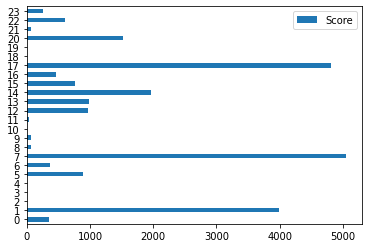

In [210]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [213]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 69.53195384300982
Test Prediction  69.50124343741365


In [215]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.07412645433803


In [216]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  62.936140903276595


In [217]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.11675146104817


In [218]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  98.2093828339501


In [219]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.2759466175188


In [220]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.86674248886361


In [221]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  1.0275059889745144


In [222]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,hop_count,4.137188
10,hop_percentage,3.614161
15,packet_count_index,2.575147
18,cache_coherence_flit_index,1.353928
6,vc,0.716843
19,flit_index,0.134314
4,flit_type,-0.013728
22,vnet_vc_index,-0.165498
2,cache_coherence_type,-0.236451
20,traversal_index,-0.288978


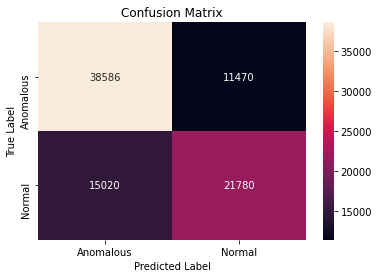

In [223]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     50056
           1       0.66      0.59      0.62     36800

    accuracy                           0.70     86856
   macro avg       0.69      0.68      0.68     86856
weighted avg       0.69      0.70      0.69     86856



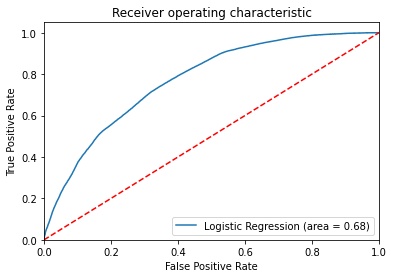

In [225]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

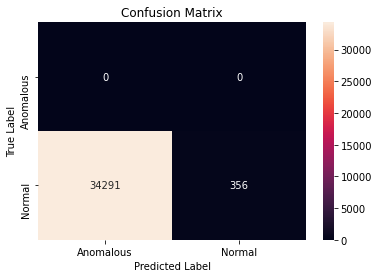

In [226]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [227]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.01      0.02     34647

    accuracy                           0.01     34647
   macro avg       0.50      0.01      0.01     34647
weighted avg       1.00      0.01      0.02     34647



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [228]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [230]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 91.54057157988964
Test Prediction  86.95311780418163


In [231]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  82.98353793064433


In [232]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  35.29961625504281


In [233]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.4362907344013


In [234]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.03597150929131


In [235]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.69653935394692


In [236]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  65.25637380343096


In [237]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  31.91618321932635


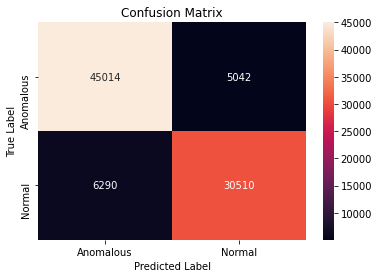

In [238]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [239]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     50056
           1       0.86      0.83      0.84     36800

    accuracy                           0.87     86856
   macro avg       0.87      0.86      0.87     86856
weighted avg       0.87      0.87      0.87     86856



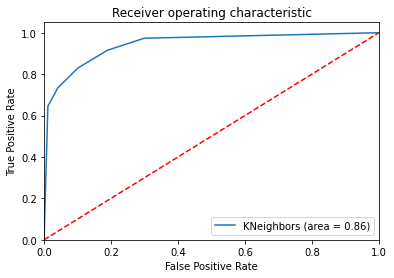

In [240]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

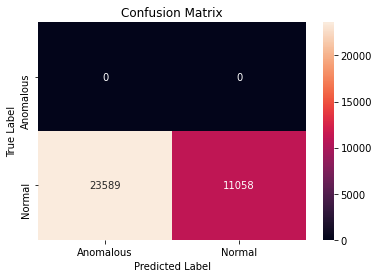

In [241]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [242]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.32      0.48     34647

    accuracy                           0.32     34647
   macro avg       0.50      0.16      0.24     34647
weighted avg       1.00      0.32      0.48     34647



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [244]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [246]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 66.5874164922875
Test Prediction Score 66.58837616284424


In [247]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 55.76926703249043


In [248]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.10006887730001


In [249]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  52.67906114652091


In [250]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.63913095380208


In [251]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  53.4285573236354


In [252]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  49.94218557482703


In [253]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  57.39602274367189


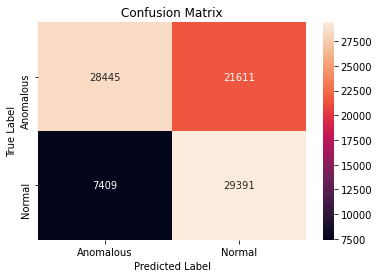

In [254]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [255]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66     50056
           1       0.58      0.80      0.67     36800

    accuracy                           0.67     86856
   macro avg       0.68      0.68      0.67     86856
weighted avg       0.70      0.67      0.67     86856



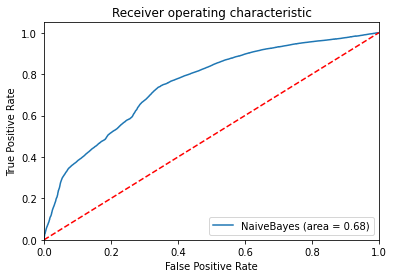

In [256]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [258]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 277938 samples, validate on 69485 samples
Epoch 1/10
277938/277938 [==============================] - 15s 53us/step - loss: 0.2043 - accuracy: 0.6694 - val_loss: 0.1946 - val_accuracy: 0.6866
Epoch 2/10
277938/277938 [==============================] - 11s 40us/step - loss: 0.1918 - accuracy: 0.6942 - val_loss: 0.1909 - val_accuracy: 0.6959
Epoch 3/10
277938/277938 [==============================] - 11s 41us/step - loss: 0.1895 - accuracy: 0.6978 - val_loss: 0.1893 - val_accuracy: 0.7000
Epoch 4/10
277938/277938 [==============================] - 11s 41us/step - loss: 0.1881 - accuracy: 0.7011 - val_loss: 0.1882 - val_accuracy: 0.7021
Epoch 5/10
277938/277938 [==============================] - 12s 43us/step - loss: 0.1868 - accuracy: 0.7040 - val_loss: 0.1871 - val_accuracy: 0.7033
Epoch 6/10
277938/277938 [==============================] - 12s 43us/step - loss: 0.1856 - accuracy: 0.7067 - val_loss: 0.1856 - val_accuracy: 0.7068
Epoch 7/10
277938/277938 [=======================

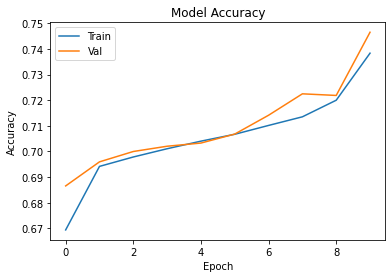

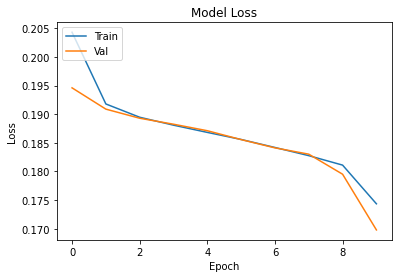

In [259]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [260]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.64%


In [261]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.34%


In [262]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.86%


In [263]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.43%


In [264]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.49%


In [265]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.27%


In [266]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.87%


In [267]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 4.82%


3-Layer Neural Network

In [268]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 277938 samples, validate on 69485 samples
Epoch 1/30
277938/277938 [==============================] - 11s 41us/step - loss: 0.2443 - accuracy: 0.5769 - val_loss: 0.2443 - val_accuracy: 0.5749
Epoch 2/30
277938/277938 [==============================] - 11s 40us/step - loss: 0.2438 - accuracy: 0.5769 - val_loss: 0.2436 - val_accuracy: 0.5749
Epoch 3/30
277938/277938 [==============================] - 11s 40us/step - loss: 0.2419 - accuracy: 0.5769 - val_loss: 0.2400 - val_accuracy: 0.5749
Epoch 4/30
277938/277938 [==============================] - 11s 40us/step - loss: 0.2220 - accuracy: 0.6295 - val_loss: 0.2036 - val_accuracy: 0.6781
Epoch 5/30
277938/277938 [==============================] - 11s 40us/step - loss: 0.1980 - accuracy: 0.6837 - val_loss: 0.1957 - val_accuracy: 0.6883
Epoch 6/30
277938/277938 [==============================] - 11s 40us/step - loss: 0.1930 - accuracy: 0.6896 - val_loss: 0.1924 - val_accuracy: 0.6913
Epoch 7/30
277938/277938 [=======================

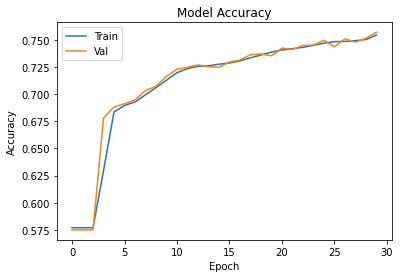

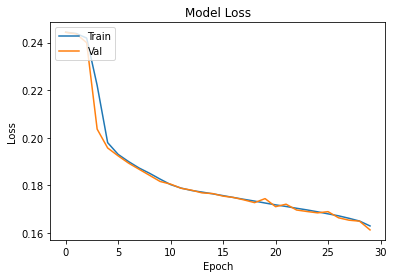

In [269]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [270]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.75%


In [271]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.79%
accuracy: 50.48%
accuracy: 93.03%
accuracy: 91.39%
accuracy: 94.52%
accuracy: 75.23%
accuracy: 4.03%


4-Layer Neural Network



In [272]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 277938 samples, validate on 69485 samples
Epoch 1/30
277938/277938 [==============================] - 12s 41us/step - loss: 0.2444 - accuracy: 0.5768 - val_loss: 0.2444 - val_accuracy: 0.5749
Epoch 2/30
277938/277938 [==============================] - 12s 42us/step - loss: 0.2441 - accuracy: 0.5769 - val_loss: 0.2444 - val_accuracy: 0.5749
Epoch 3/30
277938/277938 [==============================] - 11s 41us/step - loss: 0.2440 - accuracy: 0.5769 - val_loss: 0.2443 - val_accuracy: 0.5749
Epoch 4/30
277938/277938 [==============================] - 11s 41us/step - loss: 0.2436 - accuracy: 0.5769 - val_loss: 0.2430 - val_accuracy: 0.5749
Epoch 5/30
277938/277938 [==============================] - 11s 41us/step - loss: 0.2365 - accuracy: 0.6113 - val_loss: 0.2205 - val_accuracy: 0.6831
Epoch 6/30
277938/277938 [==============================] - 12s 42us/step - loss: 0.2035 - accuracy: 0.6943 - val_loss: 0.1939 - val_accuracy: 0.6964
Epoch 7/30
277938/277938 [=======================

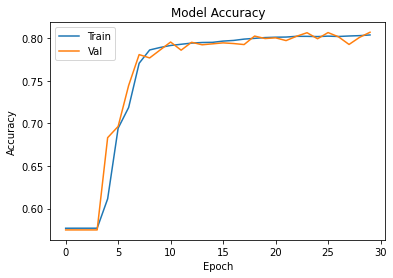

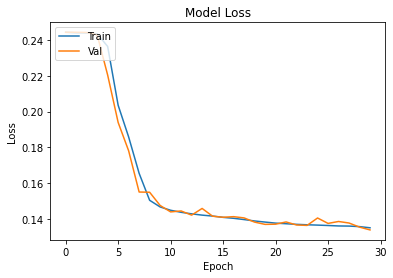

In [273]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [274]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.95%


In [275]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.11%
accuracy: 35.24%
accuracy: 92.14%
accuracy: 77.88%
accuracy: 92.31%
accuracy: 73.78%
accuracy: 21.27%


5-Layer Neural Network Optimized

In [276]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 277938 samples, validate on 69485 samples
Epoch 1/100
277938/277938 [==============================] - 22s 78us/step - loss: 0.1318 - accuracy: 0.7949 - val_loss: 0.1117 - val_accuracy: 0.8245
Epoch 2/100
277938/277938 [==============================] - 21s 76us/step - loss: 0.1187 - accuracy: 0.8180 - val_loss: 0.1055 - val_accuracy: 0.8334
Epoch 3/100
277938/277938 [==============================] - 21s 77us/step - loss: 0.1143 - accuracy: 0.8256 - val_loss: 0.1043 - val_accuracy: 0.8360
Epoch 4/100
277938/277938 [==============================] - 21s 76us/step - loss: 0.1129 - accuracy: 0.8283 - val_loss: 0.1035 - val_accuracy: 0.8358
Epoch 5/100
277938/277938 [==============================] - 21s 76us/step - loss: 0.1114 - accuracy: 0.8311 - val_loss: 0.1029 - val_accuracy: 0.8413
Epoch 6/100
277938/277938 [==============================] - 21s 76us/step - loss: 0.1105 - accuracy: 0.8314 - val_loss: 0.1032 - val_accuracy: 0.8457
Epoch 7/100
277938/277938 [================

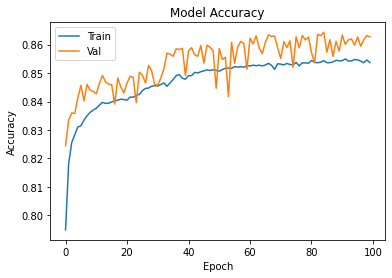

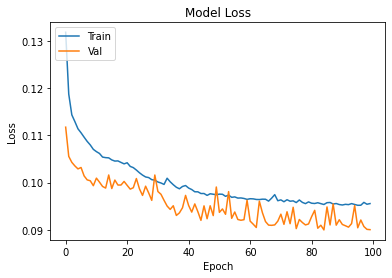

In [277]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [278]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.29%


In [279]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.13%
accuracy: 33.62%
accuracy: 90.51%
accuracy: 75.02%
accuracy: 91.99%
accuracy: 66.02%
accuracy: 19.19%


In [280]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 277938 samples, validate on 69485 samples
Epoch 1/50
277938/277938 [==============================] - 23s 83us/step - loss: 0.1312 - accuracy: 0.7987 - val_loss: 0.1109 - val_accuracy: 0.8310
Epoch 2/50
277938/277938 [==============================] - 22s 80us/step - loss: 0.1167 - accuracy: 0.8222 - val_loss: 0.1077 - val_accuracy: 0.8365
Epoch 3/50
277938/277938 [==============================] - 24s 87us/step - loss: 0.1126 - accuracy: 0.8284 - val_loss: 0.1034 - val_accuracy: 0.8409
Epoch 4/50
277938/277938 [==============================] - 23s 85us/step - loss: 0.1099 - accuracy: 0.8321 - val_loss: 0.1032 - val_accuracy: 0.8419
Epoch 5/50
277938/277938 [==============================] - 23s 82us/step - loss: 0.1082 - accuracy: 0.8347 - val_loss: 0.1026 - val_accuracy: 0.8348
Epoch 6/50
277938/277938 [==============================] - 23s 82us/step - loss: 0.1071 - accuracy: 0.8361 - val_loss: 0.0992 - val_accuracy: 0.8449
Epoch 7/50
277938/277938 [=======================

In [281]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.47%


In [282]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.79%
accuracy: 37.90%
accuracy: 91.06%
accuracy: 75.40%
accuracy: 92.65%
accuracy: 72.69%
accuracy: 27.13%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [284]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [286]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.3690458029549
Test Prediction Score 92.33789260385005


In [287]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 91.42199845373462
Test Prediction Score 51.32638000590377
Test Prediction Score 92.16045997011707
Test Prediction Score 76.77370578170387
Test Prediction Score 93.27453142227122
Test Prediction Score 75.40896597478913
Test Prediction Score 20.24417698502035


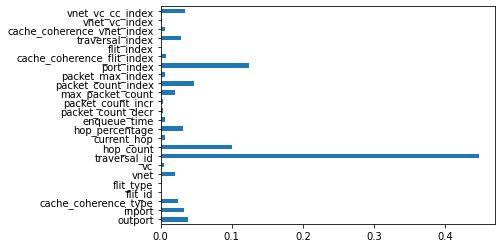

In [288]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

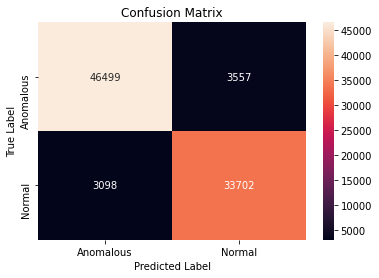

In [289]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [290]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     50056
           1       0.90      0.92      0.91     36800

    accuracy                           0.92     86856
   macro avg       0.92      0.92      0.92     86856
weighted avg       0.92      0.92      0.92     86856



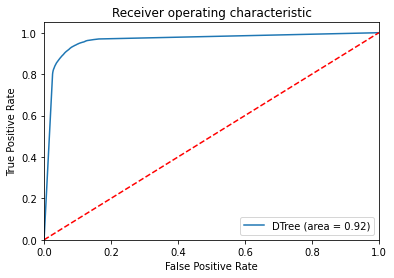

In [291]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [293]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [295]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.66710897090867
Test Prediction Score 93.71027908261951


In [296]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 93.0682053893006
Test Prediction Score 51.82328052740333
Test Prediction Score 92.59546460386208
Test Prediction Score 77.69885798416298
Test Prediction Score 94.79504352548173
Test Prediction Score 76.10842574163587
Test Prediction Score 20.723294946171386


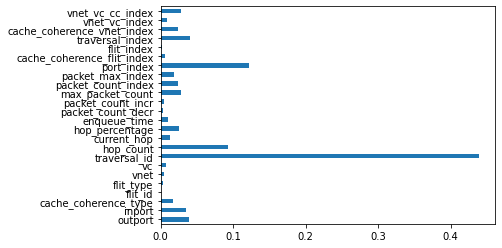

In [297]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

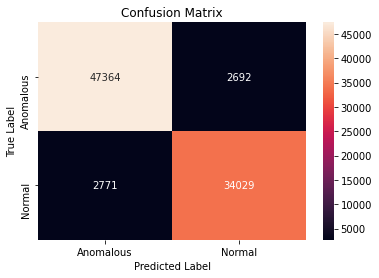

In [298]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [299]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     50056
           1       0.93      0.92      0.93     36800

    accuracy                           0.94     86856
   macro avg       0.94      0.94      0.94     86856
weighted avg       0.94      0.94      0.94     86856



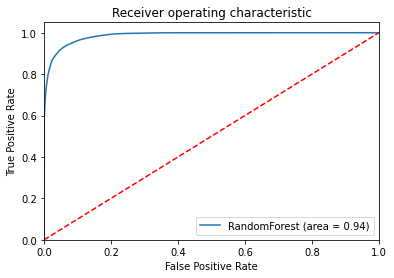

In [300]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [302]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [304]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.17967434510669
Test Prediction Score 95.2427005618495


In [305]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 88.91214572608474
Test Prediction Score 51.71012496310144
Test Prediction Score 88.82416356174228
Test Prediction Score 73.43320997970633
Test Prediction Score 91.45287893498329
Test Prediction Score 73.74656430670079
Test Prediction Score 32.82823909718013


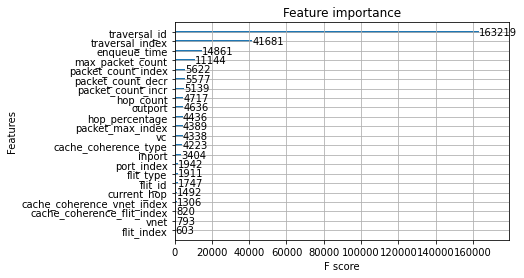

In [306]:
plot_importance(xgbc)
plt.show()

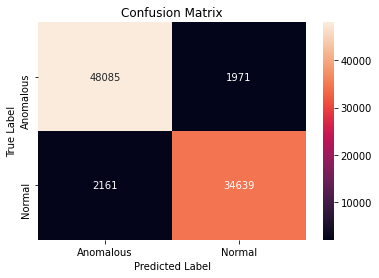

In [307]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [308]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     50056
           1       0.95      0.94      0.94     36800

    accuracy                           0.95     86856
   macro avg       0.95      0.95      0.95     86856
weighted avg       0.95      0.95      0.95     86856



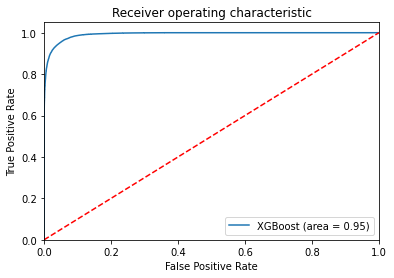

In [309]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [311]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [313]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 90.75651295394951
Test Prediction Score 90.01911209358018


In [314]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 83.80192717467142
Test Prediction Score 52.681294893240185
Test Prediction Score 84.57814007149207
Test Prediction Score 67.12426883132386
Test Prediction Score 88.30982902466718
Test Prediction Score 70.39711875651598
Test Prediction Score 41.755418939590726


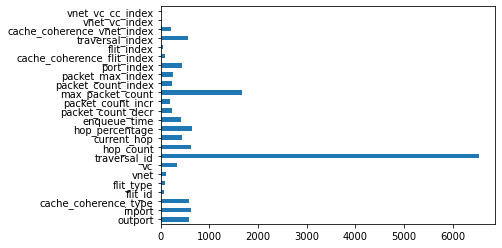

In [315]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

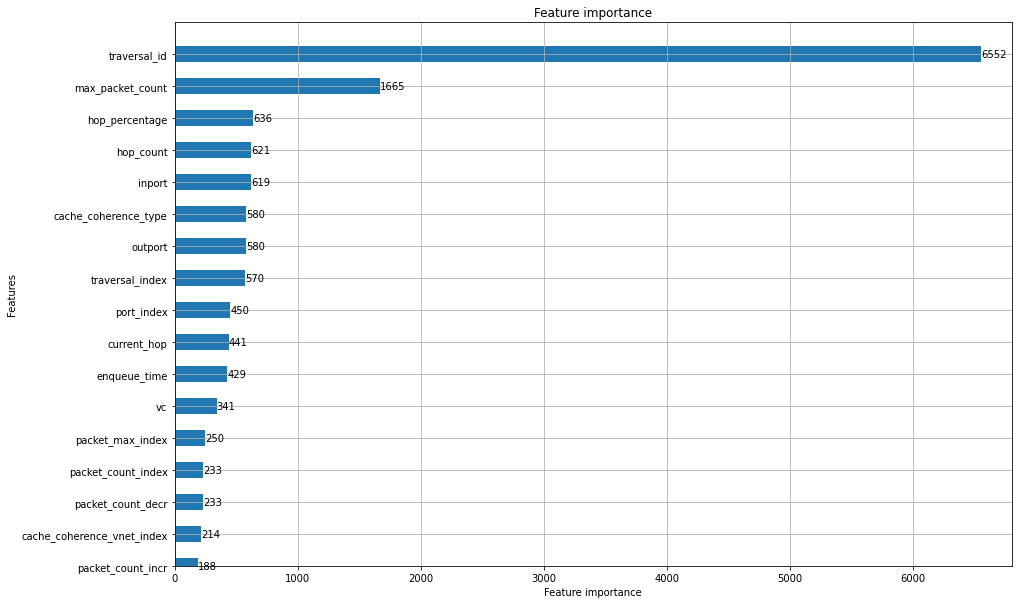

In [316]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [317]:
sorted(gbm.feature_importances_,reverse=True)

[6552,
 1665,
 636,
 621,
 619,
 580,
 580,
 570,
 450,
 441,
 429,
 341,
 250,
 233,
 233,
 214,
 188,
 106,
 88,
 81,
 61,
 60,
 2,
 0]

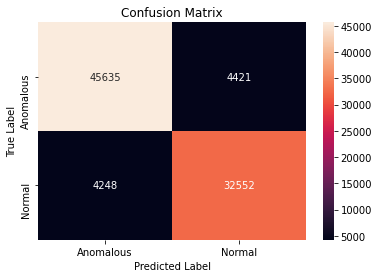

In [318]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [319]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     50056
           1       0.88      0.88      0.88     36800

    accuracy                           0.90     86856
   macro avg       0.90      0.90      0.90     86856
weighted avg       0.90      0.90      0.90     86856



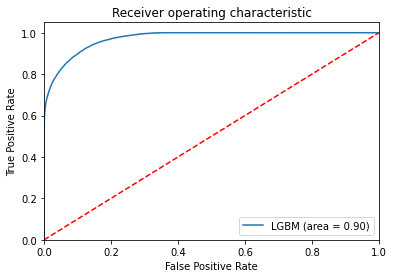

In [320]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()